##Basic Image Manipulations
In this notebook we will cover how to perform image transformations including:

Accessing and manipulating images pixels

Image resizing

Cropping

Flipping

In [ ]:
#import libraries

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Image

%matplotlib inline

##Accessing and manipulating images pixels

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


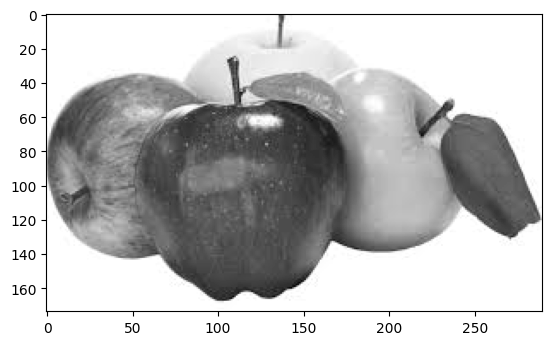

In [ ]:
# Read image as gray scale.
cb_img = cv2.imread("/content/download.jpg", 0)

# Set color map to gray scale for proper rendering.
plt.imshow(cb_img, cmap="gray")
print(cb_img)

In [ ]:
# print the first pixel of the first black box
print(cb_img[0, 0])
# print the first white pixel to the right of the first black box
print(cb_img[0, 6])

255
255


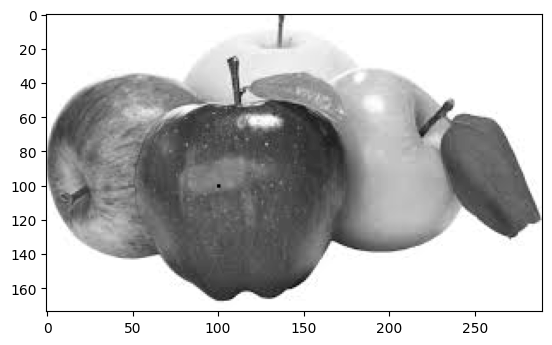

In [ ]:
cb_img_copy = cb_img.copy()
cb_img_copy[100, 100] = 0
cb_img_copy[100, 101] = 0
cb_img_copy[101, 100] = 0
cb_img_copy[101, 101] = 0

# Same as above
# cb_img_copy[2:3,2:3] = 200

plt.imshow(cb_img_copy, cmap="gray")
plt.show()


##Cropping

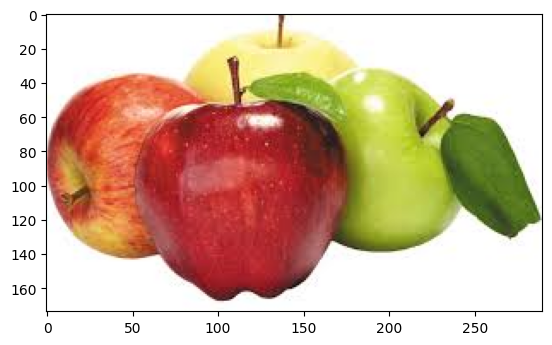

In [ ]:
img_NZ_bgr = cv2.imread("/content/download.jpg", cv2.IMREAD_COLOR)
img_NZ_rgb = img_NZ_bgr[:, :, ::-1]

plt.imshow(img_NZ_rgb)

Original image shape: (174, 290, 3)
Cropped region shape: (100, 80, 3)


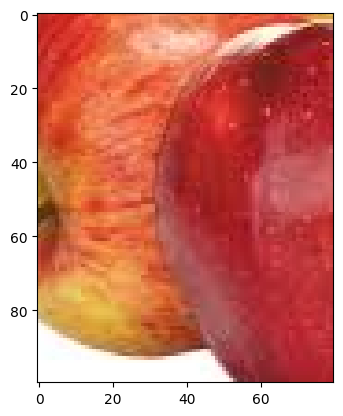

In [ ]:
# Check the shape of the original image
print("Original image shape:", img_NZ_rgb.shape)

# Cropping the image
cropped_region = img_NZ_rgb[50:150, 20:100]

##Image resizing

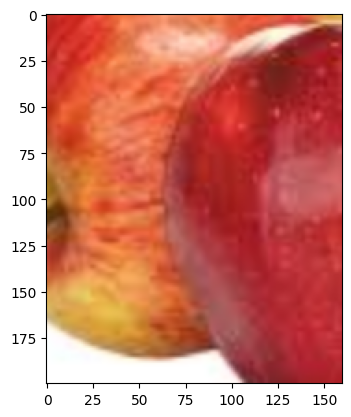

In [ ]:
resized_cropped_region_2x = cv2.resize(cropped_region, None, fx=2, fy=2)
plt.imshow(resized_cropped_region_2x)

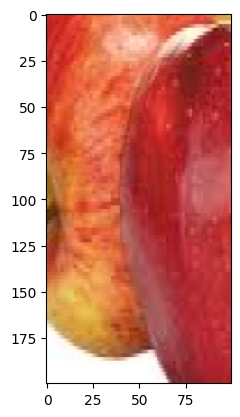

In [ ]:
desired_width = 100
desired_height = 200
dim = (desired_width, desired_height)

# Resize background image to sae size as logo image
resized_cropped_region = cv2.resize(cropped_region, dsize=dim, interpolation=cv2.INTER_AREA)
plt.imshow(resized_cropped_region)

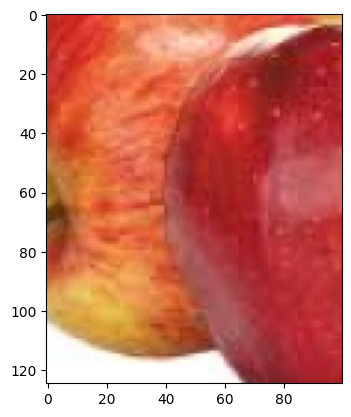

In [ ]:
# Method 2: Using 'dsize'
desired_width = 100
aspect_ratio = desired_width / cropped_region.shape[1]
desired_height = int(cropped_region.shape[0] * aspect_ratio)
dim = (desired_width, desired_height)

# Resize image
resized_cropped_region = cv2.resize(cropped_region, dsize=dim, interpolation=cv2.INTER_AREA)
plt.imshow(resized_cropped_region)

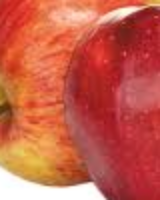

In [ ]:
# Swap channel order
resized_cropped_region_2x = resized_cropped_region_2x[:, :, ::-1]

# Save resized image to disk
cv2.imwrite("resized_cropped_region_2x.png", resized_cropped_region_2x)

# Display the cropped and resized image
Image(filename="resized_cropped_region_2x.png")

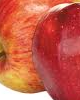

In [ ]:
# Swap channel order
cropped_region = cropped_region[:, :, ::-1]

# Save cropped 'region'
cv2.imwrite("cropped_region.png", cropped_region)

# Display the cropped and resized image
Image(filename="cropped_region.png")

##Flipping

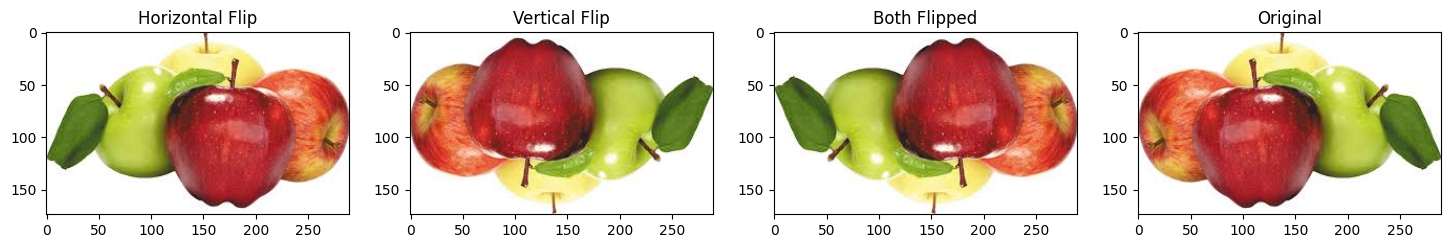

In [55]:
img_NZ_rgb_flipped_horz = cv2.flip(img_NZ_rgb, 1)
img_NZ_rgb_flipped_vert = cv2.flip(img_NZ_rgb, 0)
img_NZ_rgb_flipped_both = cv2.flip(img_NZ_rgb, -1)

# Show the images
plt.figure(figsize=(18, 5))
plt.subplot(141);plt.imshow(img_NZ_rgb_flipped_horz);plt.title("Horizontal Flip");
plt.subplot(142);plt.imshow(img_NZ_rgb_flipped_vert);plt.title("Vertical Flip");
plt.subplot(143);plt.imshow(img_NZ_rgb_flipped_both);plt.title("Both Flipped");
plt.subplot(144);plt.imshow(img_NZ_rgb);plt.title("Original");